In [3]:
import pandas as pd
import json
import os

fp = "openai_evaluations_Mar9.jsonl"

df = pd.read_json(fp, lines=True)
df

,csv_file,response,timestamp,prompt_file,model
0,data_human_11.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini
1,data_human_39.csv,"{\n ""items"": [\n {\n ""shape"": ""1023"",...",2025-03-09 18:58:09.812064,instructions/evaluation_instructions_with_shap...,o3-mini
2,data_human_38.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 19:00:59.284982,instructions/evaluation_instructions_with_shap...,o3-mini
3,data_human_10.csv,"{\n ""items"": [\n {\n ""shape"": ""1023"",...",2025-03-09 19:04:59.306935,instructions/evaluation_instructions_with_shap...,o3-mini
4,data_human_12.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 19:06:51.944551,instructions/evaluation_instructions_with_shap...,o3-mini
...,...,...,...,...,...
95,data_human_35.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 21:13:51.135321,instructions/evaluation_instructions_with_shap...,o3-mini
96,data_human_2.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 21:14:13.764755,instructions/evaluation_instructions_with_shap...,o3-mini
97,data_human_3.csv,"{\n ""items"": [\n {\n ""shape"": ""1023"",...",2025-03-09 21:14:23.734324,instructions/evaluation_instructions_with_shap...,o3-mini
98,data_human_34.csv,"{\n ""items"": [\n {\n ""shape"": ""256 38...",2025-03-09 21:14:54.113246,instructions/evaluation_instructions_with_shap...,o3-mini


In [4]:
import csv
from urllib import response

df['response_dict'] = df['response'].apply(json.loads)
response_df = pd.json_normalize(df['response_dict'], record_path=['items'])

df_list = []
for idx, row in df.iterrows():
    _response = pd.json_normalize(row['response_dict'], record_path=['items'])
    _response['timestamp'] = row['timestamp']
    _response['prompt_file'] = row['prompt_file']
    _response['model'] = row['model']
    _response['csv_file'] = row['csv_file']
    df_list.append(_response)
llm_gallery_saves = pd.concat(df_list)
llm_gallery_saves

# Add a column for the .txt file by accessing the game_file column value from each .csv file
csv_path = "../human_participants_blinded"

llm_gallery_saves['game_file'] = llm_gallery_saves['csv_file'].apply(lambda csv_file: os.path.basename(pd.read_csv(os.path.join(csv_path, csv_file)).iloc[0]['game_file']))
llm_gallery_saves.head(50)



,shape,explanation,timestamp,prompt_file,model,csv_file,game_file
0,256 384 960 384 256,This shape stands out for its beautifully symm...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
1,64 96 960 96 64,The shape features a refined central band with...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
2,528 1008 528,A striking window-like pattern that showcases ...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
3,1016 584,This design has a bold horizontal expanse comb...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
4,512 512 768 896 768 512,The stepwise expansion and contraction in this...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
5,128 960 480 128,"A delicately balanced arrow-like structure, th...",2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
6,960 128 128 960,Resembling a horizontal capsule with mirrored ...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
7,384 128 128 128 992,"Its tall, tapering form creates an arrow-head ...",2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
8,320 448 992,The stepped structure of this shape gives it a...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
9,384 960 576 576,This shape blends symmetry with an unexpected ...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt


In [5]:
# Save the dataframe to a .csv file
llm_gallery_saves.to_csv("llm_gallery_saves.csv", index=False)
llm_gallery_saves


,shape,explanation,timestamp,prompt_file,model,csv_file,game_file
0,256 384 960 384 256,This shape stands out for its beautifully symm...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
1,64 96 960 96 64,The shape features a refined central band with...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
2,528 1008 528,A striking window-like pattern that showcases ...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
3,1016 584,This design has a bold horizontal expanse comb...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
4,512 512 768 896 768 512,The stepwise expansion and contraction in this...,2025-03-09 01:05:11.967306,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_11.csv,20120523_132252.txt
...,...,...,...,...,...,...,...
5,384 960 576 576,This configuration uses open space effectively...,2025-03-09 21:15:08.754402,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_20.csv,20120510_150518.txt
6,64 96 960 96 64,"The delicate, butterfly-like symmetry of this ...",2025-03-09 21:15:08.754402,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_20.csv,20120510_150518.txt
7,512 768 512 768 512 768 512,The rhythmic alternation in its rows creates a...,2025-03-09 21:15:08.754402,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_20.csv,20120510_150518.txt
8,528 1008 528,An elegant gateway design where the flanking f...,2025-03-09 21:15:08.754402,instructions/evaluation_instructions_with_shap...,o3-mini,data_human_20.csv,20120510_150518.txt


In [6]:
from numpy import sort

# Check the number of selections per csv file
llm_gallery_saves.groupby("csv_file").size().sort_values(ascending=False)

csv_file
data_human_41.csv    29
data_human_73.csv    26
data_human_58.csv    23
data_human_26.csv    15
data_human_8.csv     15
                     ..
data_human_44.csv    10
data_human_43.csv    10
data_human_4.csv     10
data_human_39.csv    10
data_human_99.csv    10
Length: 100, dtype: int64

In [7]:
# Compare gallery selections to humans'

# Load the human responses
human_data = pd.read_csv("../data/all-games.tsv", sep="\t")
human_data.head()

# Subset to rows where the human selected the image
human_gallery_saves = human_data[human_data["timestamp_gallery"] != " "]

# For each game file, count the number of times each shape was selected by the human 
human_counts = human_gallery_saves.groupby(["game_file", "shape"]).size().reset_index(name="count")
human_counts.groupby("shape").count().sort_values("count", ascending=False)

# For each game file, count the number of times each shape was selected by the model
llm_counts = llm_gallery_saves.groupby(["game_file", "shape"]).size().reset_index(name="count")
llm_counts.groupby("shape").count().sort_values("count", ascending=False)

# Compare the human and model selections
all_selections = pd.merge(human_counts, llm_counts, on=["game_file", "shape"], how="outer", suffixes=("_human", "_model"))
all_selections = all_selections.fillna(0)

# Calculate the number of times the human and model selected the same shape
all_selections["both"] = all_selections["count_human"] == all_selections["count_model"]
all_selections.groupby("both").size()

# Calculate the number of times the human but not the model selected the shape
all_selections["human_not_model"] = all_selections["count_human"] > all_selections["count_model"]
all_selections.groupby("human_not_model").size()

# Calculate the number of times the model but not the human selected the shape
all_selections["model_not_human"] = all_selections["count_model"] > all_selections["count_human"]
all_selections.groupby("model_not_human").size()

# Save csv
all_selections.to_csv("gallery_selections_comparison.csv")

# Add columns for true positive, false positive, and false negative
all_selections["true_positive"] = all_selections["both"]
all_selections["false_positive"] = all_selections["model_not_human"]
all_selections["false_negative"] = all_selections["human_not_model"]

# Calculate precision, recall, and F1
precision = all_selections["true_positive"].sum() / (all_selections["true_positive"].sum() + all_selections["false_positive"].sum())
recall = all_selections["true_positive"].sum() / (all_selections["true_positive"].sum() + all_selections["false_negative"].sum())
f1 = 2 * (precision * recall) / (precision + recall)
precision, recall, f1


(np.float64(0.08430493273542601),
 np.float64(0.02125254352249604),
 np.float64(0.0339472733838931))

In [8]:
all_selections.head(10)

,game_file,shape,count_human,count_model,both,human_not_model,model_not_human,true_positive,false_positive,false_negative
0,20110530_180623.txt,1016 584,0.0,1.0,False,False,True,False,True,False
1,20110530_180623.txt,1023,0.0,1.0,False,False,True,False,True,False
2,20110530_180623.txt,128 128 384 960 192,1.0,0.0,False,True,False,False,False,True
3,20110530_180623.txt,128 192 128 960 640,1.0,0.0,False,True,False,False,False,True
4,20110530_180623.txt,128 224 128 896 640,1.0,0.0,False,True,False,False,False,True
5,20110530_180623.txt,128 448 128 896 256 256,1.0,0.0,False,True,False,False,False,True
6,20110530_180623.txt,128 448 128 992,1.0,0.0,False,True,False,False,False,True
7,20110530_180623.txt,128 960 480 128,0.0,1.0,False,False,True,False,True,False
8,20110530_180623.txt,160 224 896 640,1.0,0.0,False,True,False,False,False,True
9,20110530_180623.txt,256 256 256 992 320,1.0,0.0,False,True,False,False,False,True


In [9]:
# Use the decode_shape_binaries_str function to add a column of matrix representations of the shapes
from enum import unique
import sys
import os
from numpy import shape
import pandas as pd
import json

fp = "functions/tools.py"
sys.path.append(os.path.dirname(fp))
from functions.tools import decode_shape_binaries_str

# Apply the function to the shape column
all_selections["shape_matrix"] = all_selections["shape"].apply(decode_shape_binaries_str)
all_selections.head()

# Apply the matrix_to_coordinates function to the shape_matrix column
from functions.tools import matrix_to_coordinates
all_selections["shape_coordinates"] = all_selections["shape_matrix"].apply(matrix_to_coordinates)
all_selections.head()

# Print the number of unique shapes
all_selections["shape"].nunique()


1922

In [10]:
# Using the get_unique_decominoes function, access the transformation encodings for each shape in the dataset
from httpx import get
from functions.tools import get_unique_decominoes, redelmeier, get_rotations, get_reflections
import copy

unique_decominoes = get_unique_decominoes(all_selections["shape_coordinates"])
unique_decominoes
unique_decominoes = list(unique_decominoes)
unique_decominoes = [matrix_to_coordinates(decode_shape_binaries_str(shape)) for shape in unique_decominoes]
print(unique_decominoes)

[[(4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (3, 2), (4, 2), (3, 3), (4, 3)], [(2, 0), (2, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (1, 3), (2, 3), (2, 4)], [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4)], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (2, 1), (3, 1), (4, 1), (3, 2), (3, 3)], [(0, 0), (1, 0), (2, 0), (3, 0), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2), (3, 2)], [(0, 0), (1, 0), (2, 0), (3, 0), (6, 0), (0, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(2, 0), (3, 0), (2, 1), (1, 2), (2, 2), (3, 2), (0, 3), (1, 3), (2, 3), (1, 4)], [(1, 0), (3, 0), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (2, 2), (0, 3), (2, 3)], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (4, 1), (2, 2), (3, 2), (4, 2)], [(1, 0), (0, 1), (1, 1), (2, 1), (0, 2), (2, 2), (3, 2), (1, 3), (2, 3), (1, 4)], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (2, 1), (1, 2), (2, 2), (3, 2), (3, 3)], [(0, 0), (0, 1), (1, 1), (0, 2), (1, 2), (2, 2), (3, 2), (0, 3), (1, 3), (0, 4)], [(4, 0), (5, 0)

In [48]:
# Consider any two shapes that have the same transformation encoding to be the same shape
# For each shape, find the shape with the same transformation encoding

# Function to justify to the top left corner
def normalize(shape):
    min_x = min([coordinate[0] for coordinate in shape])
    min_y = min([coordinate[1] for coordinate in shape])
    return sorted([(coordinate[0] - min_x, coordinate[1] - min_y) for coordinate in shape])

free_decominoes = get_unique_decominoes(redelmeier(10))

# Convert from set to list
free_decominoes_list = list(free_decominoes)

# Convert each shape to its matrix representation, and then to its tuple representation. This is how you compare.
free_decominoes_coordinates = [normalize(matrix_to_coordinates(decode_shape_binaries_str(shape))) for shape in free_decominoes_list]
free_decominoes_coordinates


[[(0, 1),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 1),
  (3, 1),
  (4, 0),
  (4, 1),
  (5, 0),
  (6, 0)],
 [(0, 2),
  (1, 2),
  (1, 3),
  (2, 2),
  (2, 3),
  (3, 2),
  (4, 0),
  (4, 1),
  (4, 2),
  (4, 3)],
 [(0, 2),
  (0, 3),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 2),
  (3, 0),
  (3, 1),
  (3, 2),
  (4, 0)],
 [(0, 2),
  (0, 3),
  (1, 1),
  (1, 2),
  (2, 2),
  (3, 0),
  (3, 1),
  (3, 2),
  (4, 1),
  (4, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 1),
  (1, 3),
  (2, 1),
  (2, 2),
  (3, 0),
  (3, 1),
  (4, 0)],
 [(0, 3),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (4, 3)],
 [(0, 2),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 2),
  (3, 2),
  (3, 3),
  (4, 0),
  (4, 1),
  (4, 2)],
 [(0, 0),
  (0, 1),
  (1, 0),
  (2, 0),
  (2, 2),
  (3, 0),
  (3, 2),
  (4, 0),
  (4, 1),
  (4, 2)],
 [(0, 3),
  (1, 3),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (4, 2),
  (5, 2),
  (6, 2)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (1, 0),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0),
  (3, 2),
 

In [50]:
from numpy import matrix
from functions.tools import get_all_transformations, tuple_polyomino_to_grid

# Pretty print
def grid_to_string(grid):
    string = ""
    for row in grid:
        # Convert each number to string before joining
        string += " ".join(str(cell) for cell in row).replace('1', '■').replace('0', '_') + "\n"
    return string

# Function to get free_decominoes index for any given shape
def get_canonical_index(shape):
    decoded_shape = matrix_to_coordinates(decode_shape_binaries_str(shape))
    transformations = get_all_transformations(decoded_shape)
    transformations_justified = [normalize(transformation) for transformation in transformations]
    for transformation in transformations_justified:
        if transformation in free_decominoes_coordinates:
            return free_decominoes_coordinates.index(transformation)
    return -1

# Test the function on the shape column of the dataset
all_selections["canonical_index"] = all_selections["shape"].apply(get_canonical_index)
all_selections.head()

# for transformation in get_all_transformations(test_shape):
#     print(grid_to_string(tuple_polyomino_to_grid(justify_to_top_left(transformation))))

# print("_________________")
# for decomino in free_decominoes_coordinates:
#     print(grid_to_string(tuple_polyomino_to_grid(decomino)))

,game_file,shape,count_human,count_model,both,human_not_model,model_not_human,true_positive,false_positive,false_negative,shape_matrix,shape_coordinates,canonical_index,canonical_encoding,shape_class
0,20110530_180623.txt,1016 584,0.0,1.0,False,False,True,False,True,False,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, ...","[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0...",541,1016 584,0
1,20110530_180623.txt,1023,0.0,1.0,False,False,True,False,True,False,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]","[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0...",4589,1023,1
2,20110530_180623.txt,128 128 384 960 192,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ...","[(2, 0), (2, 1), (1, 2), (2, 2), (0, 3), (1, 3...",1156,128 128 384 960 192,2
3,20110530_180623.txt,128 192 128 960 640,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, ...","[(2, 0), (2, 1), (3, 1), (2, 2), (0, 3), (1, 3...",1302,128 192 128 960 640,3
4,20110530_180623.txt,128 224 128 896 640,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, ...","[(2, 0), (2, 1), (3, 1), (4, 1), (2, 2), (0, 3...",984,128 224 128 896 640,4


In [ ]:


def get_canonical_form(decomino):
    """
    Find the canonical form of a decomino by:
    1. Generate all transformations
    2. Convert each to a grid
    3. Encode each grid as a string
    4. Return the lexicographically smallest encoding
    """
    transformations = get_all_transformations(decomino)
    # Apply transformations until you get a match in free_decominoes
    # Then get the free_decominoes index of the match
    for transformation in transformations:
        transformation_str = str(transformation)
        if transformation_str in free_decominoes:
            return free_decominoes.index(transformation_str)


,game_file,shape,count_human,count_model,both,human_not_model,model_not_human,true_positive,false_positive,false_negative,shape_matrix,shape_coordinates,canonical_decomino,canonical_encoding,canonical_form
0,20110530_180623.txt,1016 584,0.0,1.0,False,False,True,False,True,False,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, ...","[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0...",4512.0,None,None
1,20110530_180623.txt,1023,0.0,1.0,False,False,True,False,True,False,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]","[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0...",1273.0,None,None
2,20110530_180623.txt,128 128 384 960 192,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ...","[(2, 0), (2, 1), (1, 2), (2, 2), (0, 3), (1, 3...",NaN,None,None
3,20110530_180623.txt,128 192 128 960 640,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, ...","[(2, 0), (2, 1), (3, 1), (2, 2), (0, 3), (1, 3...",NaN,None,None
4,20110530_180623.txt,128 224 128 896 640,1.0,0.0,False,True,False,False,False,True,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, ...","[(2, 0), (2, 1), (3, 1), (4, 1), (2, 2), (0, 3...",NaN,None,None


In [46]:
import pandas as pd
import numpy as np
from typing import List, Callable, Any

from functions.tools import encode_shape_binaries, tuple_polyomino_to_grid, get_rotations, get_reflections

# Claude's attempt. The problem here is that Claude decides that the canonical encoding is the lexographically smallest encoding of the shape, but the redelmeier function returns a different order.

def get_all_transformations(decomino):
    """Get all possible transformations (rotations and reflections) of a decomino"""
    transformations = []
    for rotation in get_rotations(decomino):
        transformations.append(rotation)
        for reflection in get_reflections(rotation):
            transformations.append(reflection)
    return transformations

def get_canonical_form(decomino):
    """
    Find the canonical form of a decomino by:
    1. Generate all transformations
    2. Convert each to a grid
    3. Encode each grid as a string
    4. Return the lexicographically smallest encoding
    """
    transformations = get_all_transformations(decomino)
    grids = [tuple_polyomino_to_grid(transform) for transform in transformations]
    encodings = [encode_shape_binaries(grid) for grid in grids]
    # Return the lexicographically smallest encoding
    return min(encodings)

def add_canonical_column(df, shape_col):
    """
    Add a column with the canonical representation of each shape in the dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing shape data
    shape_col : str
        Name of the column containing the decomino (shape) data
        
    Returns:
    --------
    pandas.DataFrame
        Original dataframe with an additional 'canonical_encoding' column
    """
    # Create a copy of the input dataframe
    result_df = df.copy()
    
    # Add the canonical representation column
    result_df['canonical_encoding'] = result_df[shape_col].apply(get_canonical_form)
    
    # You can optionally add a column to group shapes by their canonical form
    result_df['shape_class'] = result_df['canonical_encoding'].factorize()[0]
    
    return result_df

# Example usage
if __name__ == "__main__":
    # Example data with 10-coordinate decominos
    shapes = [
        [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)],  # Line
        [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)],  # Vertical line
        [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)],  # L shape
        [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]   # Rotated L shape
    ]
    
    # Create a dataframe
    df = pd.DataFrame({'shape': shapes})
    
    # Add canonical representation
    result = add_canonical_column(df, 'shape')
    
    # Print results
    for i, row in result.iterrows():
        print(f"Shape {i+1}:")
        print(f"  Original: {row['shape']}")
        print(f"  Canonical Encoding: {row['canonical_encoding'][:20]}...")  # Truncated for readability
        print(f"  Shape Class: {row['shape_class']}")
        print()
    
    # Print shape classes
    print("Shape Classes:")
    for shape_class, group in result.groupby('shape_class'):
        print(f"  Class {shape_class}: {len(group)} shapes")

Shape 1:
  Original: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
  Canonical Encoding: 1023...
  Shape Class: 0

Shape 2:
  Original: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]
  Canonical Encoding: 1023...
  Shape Class: 0

Shape 3:
  Original: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]
  Canonical Encoding: 1008 16 16 16 16...
  Shape Class: 1

Shape 4:
  Original: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]
  Canonical Encoding: 1008 16 16 16 16...
  Shape Class: 1

Shape Classes:
  Class 0: 2 shapes
  Class 1: 2 shapes


In [47]:
# Add the canonical encoding to the dataframe
all_selections = add_canonical_column(all_selections, 'shape_coordinates')
all_selections.head()

# Check the number of unique canonical encodings
all_selections['canonical_encoding'].nunique()

# Save all_selections to a .csv file
all_selections.to_csv("gallery_selections_comparison_canonical.csv", index=False)

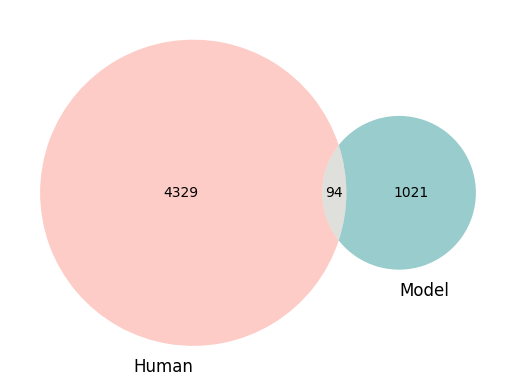

In [84]:

# Create a Venn diagram of human and model selections
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Change the colors of the Venn diagram
venn2(subsets=(all_selections["human_not_model"].sum(), all_selections["model_not_human"].sum(), all_selections["both"].sum()), set_labels=("Human", "Model"), set_colors=("salmon", "teal"))

# Save the Venn diagram
plt.savefig("gallery_selections_venn.svg")
plt.savefig("gallery_selections_venn.png")
plt.show()



In [85]:
# For each shape, calculate the number of times the human and model selected it
all_selections.groupby("shape")[["count_human", "count_model"]].sum().sort_values("count_model", ascending=False)

,count_human,count_model
shape,,
256 384 960 384 256,6.0,100.0
528 1008 528,9.0,98.0
64 96 960 96 64,3.0,98.0
320 448 992,17.0,84.0
128 960 480 128,6.0,75.0
...,...,...
256 992 320 320,1.0,0.0
256 992 288 256 256,1.0,0.0
256 992 256 256 256 256,2.0,0.0


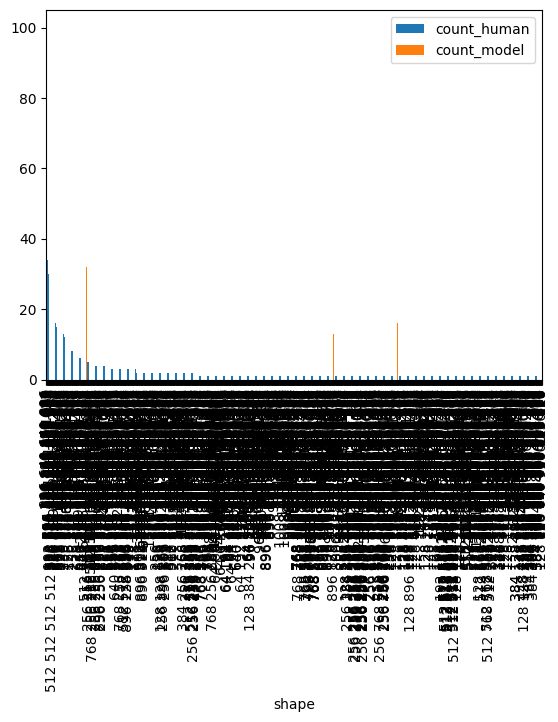

In [86]:
# Visualize the most highly selected shapes, only show x-axis labels for the top 10 shapes
all_selections.groupby("shape")[["count_human", "count_model"]].sum().sort_values("count_human", ascending=False).plot.bar()
plt.show()



In [87]:
# List the shapes that were selected by both the human and the model, sorted by frequency
both = all_selections[all_selections["both"]]
both.groupby("shape").size().sort_values(ascending=False)




shape
1023                       27
512 768 896 960            14
320 448 992                12
528 1008 528                7
256 384 960 384 256         6
128 960 480 128             4
64 96 960 96 64             3
992 448 128 128             3
256 896 256 896 256 256     3
256 896 896 896             2
384 960 576 576             2
960 128 128 960             2
1016 584                    2
272 1016 64                 1
256 896 256 896 640         1
384 128 128 128 992         1
256 896 192 896 256         1
128 896 640 896 512         1
768 992 32 32 32            1
864 320 448 128             1
dtype: int64

In [88]:

from idna import decode


def decode_shape_binaries_str(encoded_str, bits=10):
    """
    Decodes a single string of space-separated decimal codes into
    a 2D list (shape) of 0/1 bits. Each code becomes one row in the shape.

    :param encoded_str: A single string with space-separated decimal values
                        (e.g., "1016 64 64 64").
    :param bits: The fixed width of the binary representation (default=10).
    :return: A list of lists, where each sub-list is a row of bits (0's and 1's).
    """
    # Split the string by spaces to get each code as a separate token
    codes = encoded_str.split()

    shape = []
    for code in codes:
        
        # Convert the code (string) to an integer
        number = int(code)

        # Convert to binary, left-padded with zeros to the desired bit length
        binary_str = format(number, 'b').rjust(bits, '0')

        # Convert the binary string into a list of integer bits (0 or 1)
        row_of_bits = [int(bit) for bit in binary_str]
        shape.append(row_of_bits)

    return shape

def matrix_to_coordinates(matrix):
    """
    Convert a 2D array of bits to a list of (x,y) coordinate tuples on a 10x10 grid.
    
    Args:
        matrix: A 2D array/list where 1 represents a filled square and 0 represents an empty square
        
    Returns:
        A list of (x,y) tuples representing the coordinates of filled squares
        where (0,0) is the top-left corner
    """
    coordinates = []
    
    # Check if matrix is provided as a string representation
    if isinstance(matrix, str):
        import ast
        try:
            # Try to parse as a Python literal (list of lists)
            matrix = ast.literal_eval(matrix)
        except:
            # If that fails, try processing as a string representation
            matrix = matrix.replace('[', '').replace(']', '')
            rows = matrix.split('],[')
            parsed_matrix = []
            for row in rows:
                parsed_matrix.append([int(cell) for cell in row.split(',')])
            matrix = parsed_matrix
    
    # Iterate through the matrix and collect coordinates of filled cells
    for y, row in enumerate(matrix):
        for x, cell in enumerate(row):
            if cell == 1:
                coordinates.append((x, y))
    
    return coordinates

def tuple_polyomino_to_grid(tuple_polyomino):
    min_x = min([x for (x,y) in tuple_polyomino])
    min_y = min([y for (x,y) in tuple_polyomino])
    tuple_polyomino = [(x - min_x, y - min_y) for (x,y) in tuple_polyomino]
    grid = [[0 for i in range(10)] for j in range(10)]
    for (x,y) in tuple_polyomino:
        grid[x][y] = 1 # change to [y][x] if you want the shape top-justified
    return grid

def grid_to_string(grid):
    string = ""
    for row in grid:
        # Convert each number to string before joining
        string += " ".join(str(cell) for cell in row).replace('1', '■').replace('0', '_') + "\n"
    return string

decode_shape_binaries_str("256 384 960 384 256")
decode_shape_binaries_str("64 96 960 96 64")
#Arrow-like formation
decode_shape_binaries_str("128 960 480 128")
#Beautifully symmetrical
decode_shape_binaries_str("256 384 960 384 256")
#Stair step
print(grid_to_string(decode_shape_binaries_str("320 448 992")))




_ ■ _ ■ _ _ _ _ _ _
_ ■ ■ ■ _ _ _ _ _ _
■ ■ ■ ■ ■ _ _ _ _ _



In [89]:
# Visualize the top 5 human shapes
print(grid_to_string(decode_shape_binaries_str("1023")))
print(grid_to_string(decode_shape_binaries_str("896 640 640 896")))
print(grid_to_string(decode_shape_binaries_str("128 128 448 992")))
print(grid_to_string(decode_shape_binaries_str("64 192 448 960")))
print(grid_to_string(decode_shape_binaries_str("896 640 896 640")))

■ ■ ■ ■ ■ ■ ■ ■ ■ ■

■ ■ ■ _ _ _ _ _ _ _
■ _ ■ _ _ _ _ _ _ _
■ _ ■ _ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ _

_ _ ■ _ _ _ _ _ _ _
_ _ ■ _ _ _ _ _ _ _
_ ■ ■ ■ _ _ _ _ _ _
■ ■ ■ ■ ■ _ _ _ _ _

_ _ _ ■ _ _ _ _ _ _
_ _ ■ ■ _ _ _ _ _ _
_ ■ ■ ■ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _

■ ■ ■ _ _ _ _ _ _ _
■ _ ■ _ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ _
■ _ ■ _ _ _ _ _ _ _



In [90]:
# Print the top 5 model shapes
print(grid_to_string(decode_shape_binaries_str("256 384 960 384 256")))
print(grid_to_string(decode_shape_binaries_str("528 1008 528")))
print(grid_to_string(decode_shape_binaries_str("64 96 960 96 64")))
print(grid_to_string(decode_shape_binaries_str("320 448 992")))
print(grid_to_string(decode_shape_binaries_str("128 960 480 128")))

_ ■ _ _ _ _ _ _ _ _
_ ■ ■ _ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ ■ ■ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _

■ _ _ _ _ ■ _ _ _ _
■ ■ ■ ■ ■ ■ _ _ _ _
■ _ _ _ _ ■ _ _ _ _

_ _ _ ■ _ _ _ _ _ _
_ _ _ ■ ■ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ _ _ ■ ■ _ _ _ _ _
_ _ _ ■ _ _ _ _ _ _

_ ■ _ ■ _ _ _ _ _ _
_ ■ ■ ■ _ _ _ _ _ _
■ ■ ■ ■ ■ _ _ _ _ _

_ _ ■ _ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ ■ ■ ■ ■ _ _ _ _ _
_ _ ■ _ _ _ _ _ _ _



In [91]:
from numpy import shape


model_favorites = ["256 384 960 384 256", "528 1008 528", "64 96 960 96 64", "320 448 992", "128 960 480 128", "960 128 128 960", "1016 584", "512 512 768 896 768 512", "768 992 32 32 32", "256 896 192 896 256"]
for favorite in model_favorites:
    print(favorite + "\n")
    print(grid_to_string(decode_shape_binaries_str(favorite)))

256 384 960 384 256

_ ■ _ _ _ _ _ _ _ _
_ ■ ■ _ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ ■ ■ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _

528 1008 528

■ _ _ _ _ ■ _ _ _ _
■ ■ ■ ■ ■ ■ _ _ _ _
■ _ _ _ _ ■ _ _ _ _

64 96 960 96 64

_ _ _ ■ _ _ _ _ _ _
_ _ _ ■ ■ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ _ _ ■ ■ _ _ _ _ _
_ _ _ ■ _ _ _ _ _ _

320 448 992

_ ■ _ ■ _ _ _ _ _ _
_ ■ ■ ■ _ _ _ _ _ _
■ ■ ■ ■ ■ _ _ _ _ _

128 960 480 128

_ _ ■ _ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _
_ ■ ■ ■ ■ _ _ _ _ _
_ _ ■ _ _ _ _ _ _ _

960 128 128 960

■ ■ ■ ■ _ _ _ _ _ _
_ _ ■ _ _ _ _ _ _ _
_ _ ■ _ _ _ _ _ _ _
■ ■ ■ ■ _ _ _ _ _ _

1016 584

■ ■ ■ ■ ■ ■ ■ _ _ _
■ _ _ ■ _ _ ■ _ _ _

512 512 768 896 768 512

■ _ _ _ _ _ _ _ _ _
■ _ _ _ _ _ _ _ _ _
■ ■ _ _ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ _
■ ■ _ _ _ _ _ _ _ _
■ _ _ _ _ _ _ _ _ _

768 992 32 32 32

■ ■ _ _ _ _ _ _ _ _
■ ■ ■ ■ ■ _ _ _ _ _
_ _ _ _ ■ _ _ _ _ _
_ _ _ _ ■ _ _ _ _ _
_ _ _ _ ■ _ _ _ _ _

256 896 192 896 256

_ ■ _ _ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ _
_ _ ■ ■ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ 

In [92]:
# Proportion of gallery saves

# For humans, calculate the proportion of gallery saves for each game file
human_data["proportion_gallery"] = human_data["timestamp_gallery"].apply(lambda x: 1 if x != " " else 0)
human_proportions = human_data.groupby("game_file")["proportion_gallery"].mean()
human_proportions

game_file
20110530_180623.txt    0.146552
20110530_183814.txt    0.222222
20120315_141948.txt    0.124294
20120315_152932.txt    0.066860
20120320_132515.txt    0.126316
                         ...   
20120612_145045.txt    0.169444
20120612_150136.txt    0.164474
20120613_102208.txt    0.410853
20120613_111639.txt    0.241611
20120613_122200.txt    0.185714
Name: proportion_gallery, Length: 100, dtype: float64

In [93]:
# Calculate precision and recall for the model's gallery saves by comparing them to the human gallery saves
# Merge the human and model gallery saves

